# Network EDA

### Importing the necessary modules and files

In [8]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
follower = pd.read_pickle('follower_query.pkl')
following = pd.read_pickle('following_queries.pkl')

In [7]:
follower.head(10) #read as A is following B

,follower_of,user_they_follow,relationship
0,215624405,477797010,is_following
1,110105365,477797010,is_following
2,460374543,477797010,is_following
3,1048158,477797010,is_following
4,425616225,477797010,is_following
5,5077762,477797010,is_following
6,101433222,477797010,is_following
7,212128236,215624405,is_following
8,96855663,215624405,is_following
9,14598305,215624405,is_following


In [6]:
following.head(10) #read as A is followed by B

,user,is_followed_by,relationship
0,38611053,477797010,is_followed_by
1,281433942,477797010,is_followed_by
2,18088787,477797010,is_followed_by
3,326424092,477797010,is_followed_by
4,103880112,477797010,is_followed_by
5,300589910,477797010,is_followed_by
6,477797010,215624405,is_followed_by
7,309512179,215624405,is_followed_by
8,212128236,215624405,is_followed_by
9,17484668,215624405,is_followed_by


### EDA
I want to learn how to use networkx with a smaller dataset before i try to do it with all my data

In [44]:
from copy import deepcopy
follower_sample = deepcopy(follower[:100])
following_sample = deepcopy(following[:100])

In [45]:
test_graph = nx.DiGraph()

In [46]:
follower_sample.head()

,follower_of,user_they_follow,relationship
0,215624405,477797010,is_following
1,110105365,477797010,is_following
2,460374543,477797010,is_following
3,1048158,477797010,is_following
4,425616225,477797010,is_following


In [47]:
# ok i need to turn this into a tuple
follower_tuple_list = []
for index, row in follower_sample.iterrows():
    follower_tuple_list.append((row[0], int(row[1])))
    #break
#  follower_tuple_list

In [48]:
# do the same for the followings

# ok i need to turn this into a tuple
following_tuple_list = []
for index, row in following_sample.iterrows():
    following_tuple_list.append((row[0], int(row[1])))
    #break
#  follower_tuple_list

In [49]:
test_graph.add_edges_from(follower_tuple_list)

In [50]:
test_graph.add_edges_from(following_tuple_list)

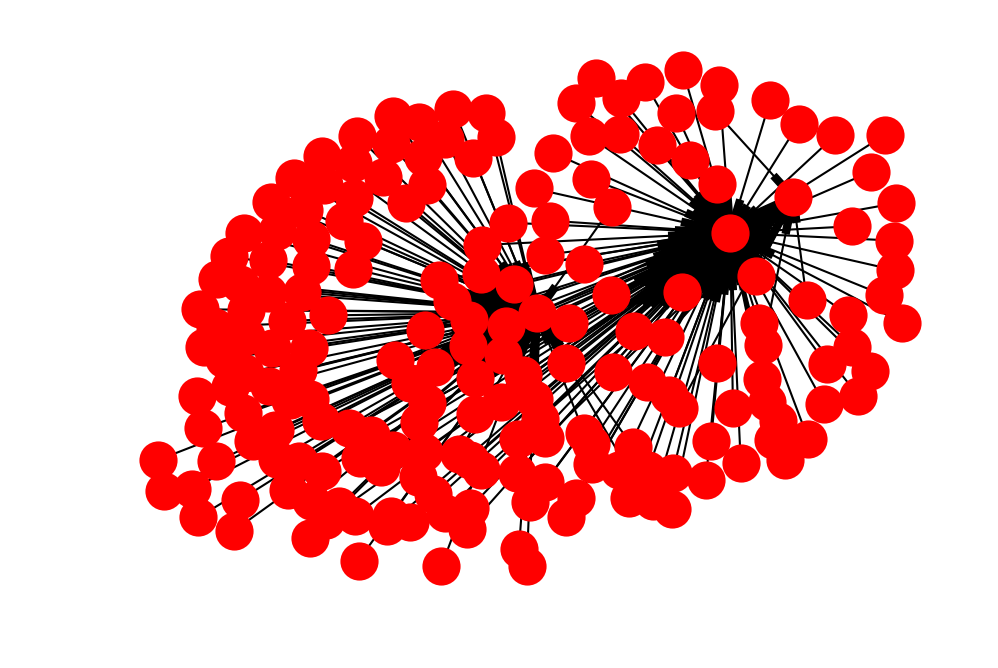

In [53]:
plt.figure(dpi = 150)
nx.draw(test_graph, with_labels=0)

In [54]:
from networkx.algorithms import community as co

community_generator = co.girvan_newman(test_graph)

In [55]:
type(community_generator)

generator